# 전처리 모듈 테스트
스크래핑을 통해 가져온 HTML을 파싱한 후 질문에 대한 정답이 어느정도 있는지 확인하여 모듈의 성능을 테스트합니다.

In [1]:
import sys
## Root 파일(.py)을 Import 하기
sys.path.append("../")

In [2]:
from scrap import get_wiki_data, get_blog_data
from convert import Korquad2_Converter
from blog_convert import Blog_Converter
import pandas as pd

In [3]:
#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
#폰트 경로
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font 설정
matplotlib.rc('font',family=font_name)

## 1. 크롤링 테스트 QA 데이터
QA_testset은 8가지 카테고리를 갖고 있는 총 100개 데이터셋입니다. 질문과 짧은 답변으로만 이루어져 있으므로 스크래핑된 HTML에 답변이 있는지에 대한 간단한 모듈테스트에 적합합니다. 'QA_crawler_test_result.csv'는 Crawler Module Test가 완료된 csv 파일입니다.

In [4]:
data_path = 'QA_crawler_test_result.csv'
test_df = pd.read_csv(data_path)

In [5]:
test_df['카테고리'].unique()

array(['역사', '경제경영', '사회', '정치', '과학', '문화스포츠', '인문학', '기타'], dtype=object)

## 2. WIKI 전처리 모듈 테스트
[위키피디아](https://ko.wikipedia.org/w/index.php?search=) 에서 크롤링한 데이터를 전처리한 후 질문에 맞는 대답을 어느정도 갖고 있는지 테스트 합니다.

In [11]:
wiki_converter = Korquad2_Converter()
def check_wiki_preprocess_answer(question, answer, num):
    for html in get_wiki_data(question, num):
        paragraphs = wiki_converter.convert_html(html)
        for paragraph in paragraphs:
            if answer in paragraph:
                return 1
    return 0

In [12]:
%%time
test_df['wiki_has_preprocess_answer_1'] = test_df.apply(lambda row: check_wiki_preprocess_answer(row['question'], row['answer'], 1), axis=1)
print("WIKI URL 1개의 coverage : {}".format(test_df['wiki_has_preprocess_answer_1'].sum()/len(test_df)))

WIKI URL 1개의 coverage : 0.46
Wall time: 3min 6s


In [13]:
%%time
test_df['wiki_has_preprocess_answer_5'] = test_df.apply(lambda row: check_wiki_preprocess_answer(row['question'], row['answer'], 5), axis=1)
print("WIKI URL 5개의 coverage : {}".format(test_df['wiki_has_preprocess_answer_5'].sum()/len(test_df)))

WIKI URL 5개의 coverage : 0.56
Wall time: 5min 54s


In [14]:
total_count = test_df.groupby(['카테고리'])['카테고리'].count()
wiki_has_answer_1_count = test_df.groupby(['카테고리'])['wiki_has_answer_1'].sum()
wiki_has_answer_5_count = test_df.groupby(['카테고리'])['wiki_has_answer_5'].sum()
wiki_has_answer_preprocess_1_count = test_df.groupby(['카테고리'])['wiki_has_preprocess_answer_1'].sum()
wiki_has_answer_preprocess_5_count = test_df.groupby(['카테고리'])['wiki_has_preprocess_answer_5'].sum()
wiki1 = (wiki_has_answer_1_count/total_count)
wiki5 = (wiki_has_answer_5_count/total_count)
wiki_preprocess1 = (wiki_has_answer_preprocess_1_count/total_count)
wiki_preprocess5 = (wiki_has_answer_preprocess_5_count/total_count)

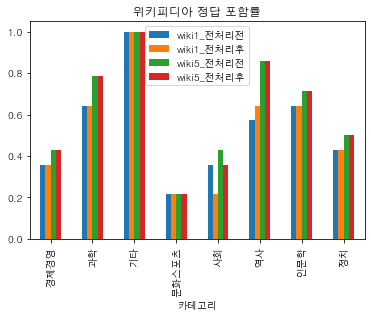

In [15]:
pd.concat([wiki1, wiki_preprocess1, wiki5, wiki_preprocess5], keys=['wiki1_전처리전', 'wiki1_전처리후', 'wiki5_전처리전', 'wiki5_전처리후'], axis=1).plot.bar(title="위키피디아 정답 포함률")

## 3. 블로그 전처리 모듈 테스트
[네이버블로그](https://search.naver.com/search.naver) 에서 크롤링한 데이터를 전처리한 후 질문에 맞는 대답을 어느정도 갖고 있는지 테스트 합니다.

In [6]:
blog_converter = Blog_Converter()
def check_blog_preprocess_answer(question, answer, num):
    for html in get_blog_data(question, num):
        paragraphs = blog_converter.convert_html(html)
        for paragraph in paragraphs:
            if answer in paragraph:
                return 1
    return 0

In [7]:
%%time
test_df['blog_has_preprocess_answer_1'] = test_df.apply(lambda row: check_blog_preprocess_answer(row['question'], row['answer'], 1), axis=1)
print("BLOG URL 1개의 coverage : {}".format(test_df['blog_has_preprocess_answer_1'].sum()/len(test_df)))

BLOG URL 1개의 coverage : 0.46
Wall time: 57.5 s


In [8]:
%%time
test_df['blog_has_preprocess_answer_5'] = test_df.apply(lambda row: check_blog_preprocess_answer(row['question'], row['answer'], 5), axis=1)
print("BLOG URL 5개의 coverage : {}".format(test_df['blog_has_preprocess_answer_5'].sum()/len(test_df)))

BLOG URL 5개의 coverage : 0.76
Wall time: 2min 20s


In [9]:
total_count = test_df.groupby(['카테고리'])['카테고리'].count()
blog_has_answer_1_count = test_df.groupby(['카테고리'])['blog_has_answer_1'].sum()
blog_has_answer_5_count = test_df.groupby(['카테고리'])['blog_has_answer_5'].sum()
blog_has_answer_preprocess_1_count = test_df.groupby(['카테고리'])['blog_has_preprocess_answer_1'].sum()
blog_has_answer_preprocess_5_count = test_df.groupby(['카테고리'])['blog_has_preprocess_answer_5'].sum()
blog1 = (blog_has_answer_1_count/total_count)
blog5 = (blog_has_answer_5_count/total_count)
blog_preprocess1 = (blog_has_answer_preprocess_1_count/total_count)
blog_preprocess5 = (blog_has_answer_preprocess_5_count/total_count)

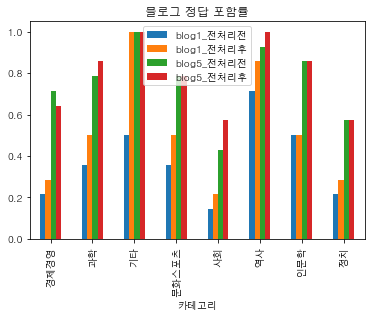

In [10]:
pd.concat([blog1, blog_preprocess1, blog5, blog_preprocess5], keys=['blog1_전처리전', 'blog1_전처리후', 'blog5_전처리전', 'blog5_전처리후'], axis=1).plot.bar(title="블로그 정답 포함률")

## 4. 블로그, WIKI 전처리 모듈 테스트
위키피디아와 네이버블로그 에서 크롤링한 데이터가 질문에 맞는 대답을 어느정도 갖고 있는지 테스트 합니다.

In [16]:
test_df['wiki_blog_has_answer_1'] = test_df.apply(lambda row: int(row['wiki_has_answer_1']+row['blog_has_answer_1']>0), axis=1)
test_df['wiki_blog_has_preprocess_answer_1'] = test_df.apply(lambda row: int(row['wiki_has_preprocess_answer_1']+row['blog_has_preprocess_answer_1']>0), axis=1)
print("WIKI_BLOG URL 전처리 전 1개의 coverage : [{}]  전처리 후 1개의 converage [{}]".format(test_df['wiki_blog_has_answer_1'].sum()/len(test_df), test_df['wiki_blog_has_preprocess_answer_1'].sum()/len(test_df)))

WIKI_BLOG URL 전처리 전 1개의 coverage : [0.62]  전처리 후 1개의 converage [0.66]


In [17]:
test_df['wiki_blog_has_answer_5'] = test_df.apply(lambda row: int(row['wiki_has_answer_5']+row['blog_has_answer_5']>0), axis=1)
test_df['wiki_blog_has_preprocess_answer_5'] = test_df.apply(lambda row: int(row['wiki_has_preprocess_answer_5']+row['blog_has_preprocess_answer_5']>0), axis=1)
print("WIKI_BLOG URL 전처리 전 5개의 coverage : [{}]  전처리 후 5개의 converage [{}]".format(test_df['wiki_blog_has_answer_5'].sum()/len(test_df), test_df['wiki_blog_has_preprocess_answer_5'].sum()/len(test_df)))

WIKI_BLOG URL 전처리 전 5개의 coverage : [0.83]  전처리 후 5개의 converage [0.84]


## 결론 및 분석
모듈 평가는 HTML 또는 전처리한 후 Context에 정답 TEXT가 '정확히' 있는가를 평가한다. 따라서 전처리 전 "span", "p" 테그등으로 나뉘였던 HTML이 전처리 후 하나의 Text로 합쳐졌기 때문에 오히려 전처리 후 정답 Converage가 커졌다.

In [19]:
test_df.to_csv("QA_preprocess_test_result.csv")